In [2]:
from data.dataset import MyDataset

dataset = MyDataset(
    data_dir="ml-100k",
    ratings_path="u.data",
    ratings_sep="\t",
    items_path="",
    items_sep="",
)
print("Succesfully read data!")
dataset.trainTestValidationSplit()
print("Performed data split!")



Succesfully read data!
Performed data split!


In [4]:
from recommender.model.RBM import RBM
from pprint import pprint
bs = 20

rbm = RBM(
    n_visible=dataset.nItems,
    ratings=10,
    verbose=True,
    #device="cuda",
    n_hidden=100,
    batch_size=bs,
    learning_rate=1e-3,
    early_stopping=True,
    max_epoch=1000,
    patience=5,
)

rbm.save_model_to_file("untrainedRBM.pt")


In [5]:
rbm.fit(dataset)
rbm.fit(dataset, t=3)
rbm.fit(dataset, t=5)
rbm.fit(dataset, t=7)
rbm.fit(dataset, t=9)

#####	--------------------	TRAIN				VALIDATION
Epoch	--------------------	RMSE		MAE		RMSE		MAE
0	###################	3.690184	2.980451	3.566397	2.809119	
1	###################	3.248865	2.509151	2.817408	2.101793	
2	###################	3.034532	2.306786	2.619624	1.914195	
3	###################	2.926767	2.206403	2.585199	1.903003	
4	###################	2.954925	2.219481	2.545661	1.868035	
5	###################	2.888717	2.168456	2.510623	1.853327	
6	###################	2.890509	2.164191	2.547031	1.884021	
7	###################	2.889799	2.162535	2.474042	1.795669	
8	###################	2.877658	2.157439	2.487174	1.836376	
9	###################	2.863248	2.139325	2.531593	1.874221	
10	###################	2.836715	2.120376	2.463286	1.821127	
11	###################	2.806422	2.086933	2.455530	1.802706	
12	###################	2.920939	2.192632	2.485646	1.823854	
13	###################	2.837478	2.127963	2.479932	1.831021	
14	###################	2.796911	2.084930	2.488533	1.839638	
15	############

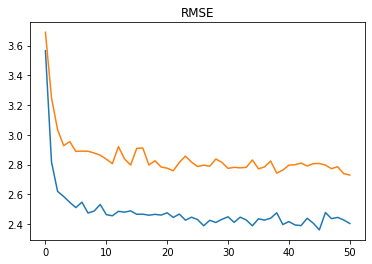

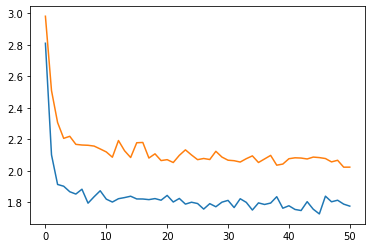

In [6]:
import matplotlib.pyplot as plt

plt.title("RMSE")

plt.plot(rbm.metrics.validRMSE)
plt.plot(rbm.metrics.trainRMSE)
plt.show()
plt.plot(rbm.metrics.validMAE)
plt.plot(rbm.metrics.trainMAE)
plt.show()

In [7]:
rbm.metrics.bestRMSE

{'epoch': 45, 'value': 2.3604193490635734}

In [8]:
rbm.metrics.bestMAE

{'epoch': 45, 'value': 1.7274574342720144}